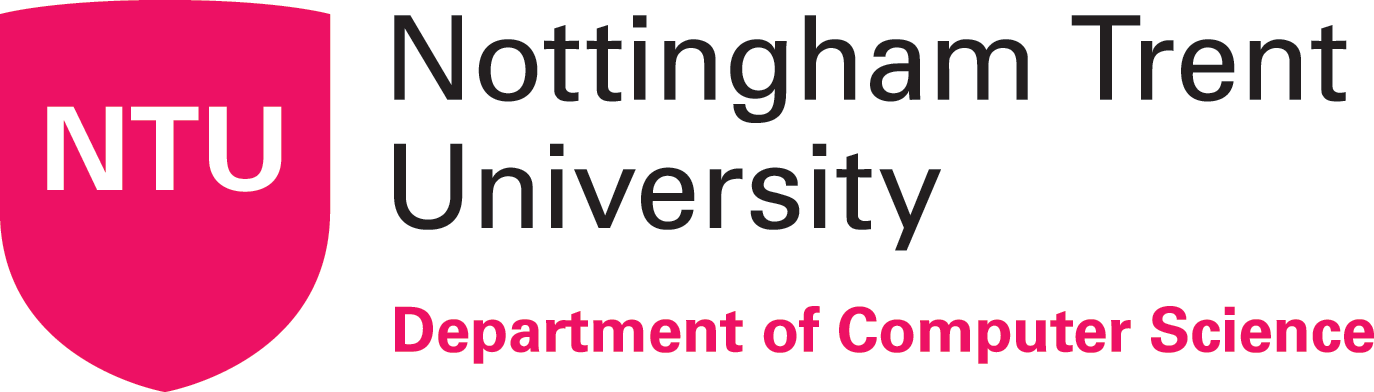

# Python Programming for Real World Data Analytics and GUI Development
## SOFT40161 - Introduction to Computer Programming
### Submission of the Coursework

## Name: Natan Majchrzak
## NTU ID:

<font  color= 'red'> **The Full description of the Coursework is here -** </font>
<a href="https://now.ntu.ac.uk/d2l/le/content/1110621/viewContent/14307207/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-
<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/">Update the link and text (Click here)</a>

# Section 1: Control Structures (12 marks)


# Explanation and Documentation 
Dataset Overview and Real-World Problem
The dataset used in this analysis is the Pima Indians Diabetes Dataset from the National Institute of Diabetes and Digestive and Kidney Diseases.

Diabetes is a chronic public health issue that affects how the body turns food into energy. In a clinical setting, identifying High risk individuals and anomalies is critical for early intervention and personalised treatment. This analysis uses computational control structures to isolate these groups for further study.

Methodology: Control structures 
 - PD.read_csv was used to import the data into a structured dataframe.
 - Iteration (for loop): iterrows() function was utilised to traverse every row of the dataset individually
 - Conditional logic (if statement): used conditionals to filter for high risk patients to calculate their average BMI.
    - Used nested if statements to identify patients who were diagnosed with diabetes but presented with low glucose levels, which is an unsual medical finding.
 - List structure: storing the indices of specific patients, allowing for easy data retrieval at the end of the script.







In [1]:
import pandas as pd

#loading the dataset
file = "diabetes.csv"
pid_df = pd.read_csv(file)
#testing to make sure the dataset was loaded correctly.
#print(pid_df) 

#Initializing variables 
high_risk_threshold = 140
low_risk_threshold = 100
bmi_sum = 0
high_risk_patients = 0
anomaly_list = [] #empty list to store anomalies in.

for index, row in pid_df.iterrows():
    current_glucose = row["Glucose"]
    current_bmi = row["BMI"]
    current_outcome = row["Outcome"]
    #Average calculation
    if current_glucose > high_risk_threshold:
        bmi_sum += current_bmi
        high_risk_patients += 1
    #Anomaly detection 
    if current_outcome == 1:
        #saves all anomalies into a list, this way all anomalies (outliers) can be identified and saved.
        if current_glucose <= low_risk_threshold:
            anomaly_list.append(index)

if high_risk_patients > 0:
    average = bmi_sum / high_risk_patients
    print("Total amount of patients in the high risk threshold: ", high_risk_patients,"\n" + "Average BMI of the high risk patients: ", average)

print("The anomalies detected (indicies): ", anomaly_list) #index numbers of the anomalies displayed
print(pid_df.loc[anomaly_list, ["Glucose", "BMI", "Outcome"]]) #displaying the anomalies details 





Total amount of patients in the high risk threshold:  192 
Average BMI of the high risk patients:  34.92708333333334
The anomalies detected (indicies):  [6, 15, 38, 70, 109, 125, 218, 254, 298, 349, 400, 429, 502, 510, 540, 542, 638, 659, 709, 719]
     Glucose   BMI  Outcome
6         78  31.0        1
15       100  30.0        1
38        90  38.2        1
70       100  32.9        1
109       95  37.4        1
125       88  55.0        1
218       85  29.0        1
254       92  27.6        1
298      100  36.6        1
349        0  41.0        1
400       95  32.0        1
429       95  35.0        1
502        0  39.0        1
510       84  29.7        1
540      100  39.4        1
542       90  34.9        1
638       97  40.9        1
659       80  34.2        1
709       93  38.0        1
719       97  35.6        1


# Reflection on results 
Analysis results:
- High risk patient insights: The average BMI of high risk patients was calculated to be approximately 34.93 indicating a correlation between weight and elevated glucose levels.
- Anomalies: Identified 20 anomaly patients who have been diagnosed with diabetes despite maintaining relatively low glucsose levels at the time of testing.

Reflection and Limitations:
- While the itterows() aproachj is highly readable and perfect for demonstrating control structures it will be computationally slow on a large database with millions of rows.
- A Significant limitation noted in this dataset is the presence of 0 values in columns like BMI and Glucose, which likelt represnets missing data rather than the real measurments.
- To improve the accuracy of the average BMI calculation, future iterations of this code should a data handling section to remove or impute the zeros in the critical columns before the loop begins.


# Section 2: Functions and Modules (16 marks)  

# Explanation and Documentation 
The primary goal of this section is the implementation of modular functions using multiple external libraries to perform a comprehensive data analysis of the Pima Indians Diabetes dataset.

Splitting the code into multiple reusable functions is essential for maintaining a high standard of code quality.

Each function has a single, clear responsibility – loading, auditing, or visualising making the code easier to maintain and test. By using parameters, these functions can be applied to other datasets with minimal modification. Error handling has been implemented with the try-except blocks and conditional checks. This ensures that if the external source is unavailable or the data is missing, the program provides clear feedback rather than crashing.

External Modules: 

Four specialised external modules were used.

1. Pandas: used for robust data ingestion and creating a correlation matrix for the analysis.
2. NumPy: Leveraged for high-performance numerical auditing. I used np.sum() to identify hidden missing values (zeros) in specific important columns where a zero value is medically invalid.
3. Matplotlib: Used to configure the visual environment, setting the figure size for the charts.
4. Seaborn: Used for visualisation to generate a color coded heatmap of feature correlations.

Functions:
- load_dataframe(file_path): safely imports the dataset into a dataframe, using a try-except block to make sure the data source is successfully reached.
- data_summary(df, check_cols): this function provides a descriptive analysis and identifies critical data gaps using numpy logical operators, it also includes a validation check to ensure the data exists before attempting analysis.
- visualise_correlations(df): by using Seaborn and Matplotlib this function identifies relationships between the features, for example the link between SkinThickness and Insulin is 0.44.



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
dataframes shape: (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807   

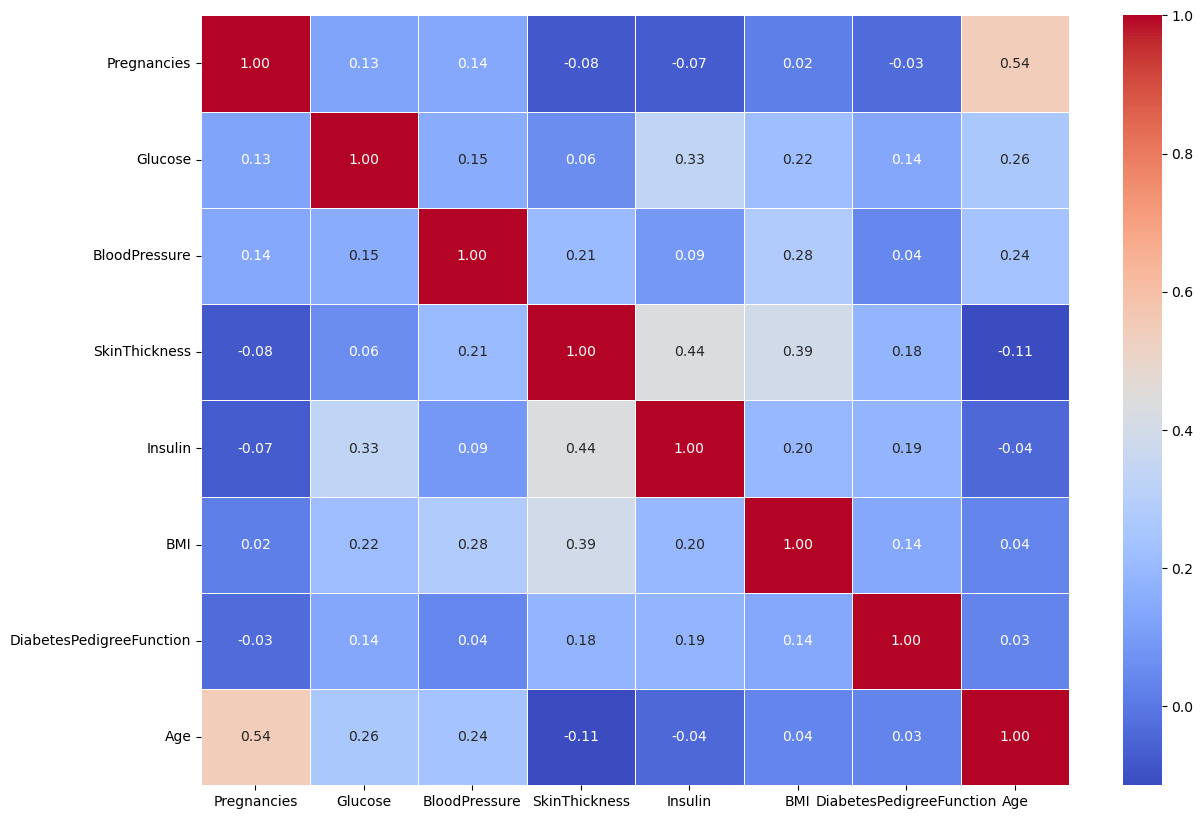

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "diabetes.csv"

cols_to_check = ['Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness']

#loads the file into a dataframe (uses pandas).
def load_dataframe(file_path):
    try:
        df = pd.read_csv(file_path) #loads the dataframe 
        return df
    except FileNotFoundError:
        print("Error file not found!")
        return None

#Looking at the dataframes data and using numpy to check for entries with 0 as this would likely be a missing value in this dataset for specific medical columns (uses pandas, numpy).
def data_summary(df, check_cols):
    #checking to make sure there is a dataframe to analyse
    if df is None:
        print("Error no data to analyse!")
    
    print(df.head())
    print(f"dataframes shape: {df.shape}")
    print(df.describe())

    #using numpy to check for zero entires inside specific columns
    if check_cols is not None:
        for col in check_cols:
            zero_in_cols = np.sum(df[col] == 0) #numpy operator 
            print(f"{col}: {zero_in_cols} zeros found")

#Plotting data to visualise correlations to identify which features are most likely to impact the diabetes outcome (uses pandas, matplotlib and seaborn).
def visualise_correlations(df):
    #defining the figure size 
    plt.figure(figsize=(14, 10))

    #dropping the outcome colummn to focus on the features against eachother
    correlation_matrix = df.drop('Outcome', axis = 1).corr()
    #plotting the numbers in a heatmap where red is negative and blue is positive
    sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidth = .5)

    
#loading the dataframe   
df = load_dataframe(file)
#looking at basic information on the dataframe and checking for zeros in specific columns in which zeros would be invalid.
data_summary(df, cols_to_check)
visualise_correlations(df)
    


# Reflection on results 
Analysis results

Using the data_summary function, an audit of hidden missing values was performed. The audit revealed a high frequency of zero entries in columns which were physiologically impossible, such as SkinThickness. These zeros act as noise in the data, identifying them using numpy suggests that future predictive models would require data imputation or removal of these rows to maintain accuracy. The heatmap produced by the visualise_correlations function produced a heatmap that identifies how physiological features move in relation to one another. A moderate correlation exists between insulin and SkinThickness which may relate to body composition and metabolic health, on the other hand features like DiabetesPedigreeFunction show very low correlation with Age, indicating that genetic hereditary scores in this dataset do not significantly change as the person gets older.




# Section 3: Data Handling with Pandas (16 marks)  

# Explanation and Documentation 
Data cleaning and inconsistency management:
The objective of this section was to implement a professional data cleaning pipeline to ensure the Pima Indians Diabetes dataset was accurate and reliable for deeper analysis.

During data ingestion the na_values parameter was used to identify non-standard symbols, which were then converted into formal NaN values to ensure consistent behaviour across Pandas operations. Duplicate entries were removed to prevent data skewing. A critical step was to handle the identified zeros in the medical columns. In this dataset, a zero in these specific fields represents missing data therefore, the zeros were converted into null values, ensuring they do not pull down the statistical averages. To preserve the sample size of this relatively small dataset, I chose to fill NaN values rather than dropping rows. I used the median of each column because it is a robust measure of central tendency that is not influenced by extreme outliers.

Physiological data often contains extreme values that can distort trends. To handle this, the Interquartile Range (IQR). Calculating bounds, the statistical boundaries were defined using the formula q1 - 1.5 * IQR and q3 + 1.5 * IQR. The outliers at these boundaries were capped.

The final step involved a descriptive statistical analysis to extract meaningful insights from the cleaned data. By grouping the data by Outcome (diabetic vs healthy), the mean and standard deviation were calculated for the six critical health indicators.

error handling was implemented in the data loading function to manage FileNotFoundError, validation checks were implemented into each function (if df is None). This ensures the pipeline only continues if the data was successfully loaded, preventing system crashes.

Logic has been separated into reusable functions with descriptive variable names, making the code easy to follow.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

file = "diabetes.csv"

numerical_cols = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] #numerical columns in the dataset
medical_0_error_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#loads the file into a dataframe and standardises all missing values 
def load_and_clean_data(file_path):
    missing_symbols = ['N/A', 'na', '-', '?',' '] #defining the non standard missing values 
    try:
        df = pd.read_csv(file_path, na_values=missing_symbols) #loads the dataframe and if the missing symbols turn up they get turned into a standard missing value
    except FileNotFoundError:
        ("Error file not found!")
        
    return df #returns the dataframe

#drops all duplicates in each column 
def drop_duplicates(df):
    #checks to make sure the dataframe exists 
    if df is None: return None
    df_cleaned = df.drop_duplicates()

    return df_cleaned #returns dataframe without duplicates
    
def handle_0_errors(df, cols_to_fix):
    if df is None: return None
    for col in cols_to_fix:
        #replacing the 0s with nans
        df[col] = df[col].replace(0, np.nan)

    return df

def handle_missing_values(df, cols_to_handle):
    if df is None: return None
    #imputing the missing values (nans) with the median values becuase this is a small dataset it is better not to delete any rows.
    for col in cols_to_handle:
        median = df[col].median()
        df[col] = df[col].fillna(median)

    return df
    
#uses the IQR method to cap outliers 
def clean_outliers(df, numerical_columns):
    if df is None: return None
    #IQR method to handle outliers by capping them.
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        #replaced by numpy
        #df.loc[df[col] > upper_bound, col] = upper_bound
        #df.loc[df[col] < lower_bound, col] = lower_bound

        #forcing the values outside the bounds to equal the bounds
        df[col] = np.clip(df[col], lower_bound, upper_bound)
         
        print("\n")
        print(f"outliers have been capped for column: {col}")
    
    return df

def aggregate_health_metrics(df):
    # grouping data to find a deeper insight
    if df is None: return None

    #grouping by outcome to see how SkinThickness varies between groups
    summary = df.groupby('Outcome').agg({
        'SkinThickness': ['mean','std'], # mean and standard deviation
        'Insulin': ['mean','std'],
        'BloodPressure': ['mean','std'],
        'BMI': ['mean','std'],
        'Glucose': ['mean', 'std'],
        'DiabetesPedigreeFunction': ['mean', 'std']
        
    })
    return summary.round(2) # 2 decimal place for better readability 




df = load_and_clean_data(file)
#print(df)
#print("\n")
print(f"{df.shape}")
df = drop_duplicates(df)
print(f"{df.shape}")
df = handle_0_errors(df, medical_0_error_columns)
df = handle_missing_values(df, medical_0_error_columns)
df = clean_outliers(df, numerical_cols)

summary_health_metrics = aggregate_health_metrics(df)
display(summary_health_metrics)

(768, 9)
(768, 9)


outliers have been capped for column: Pregnancies


outliers have been capped for column: Glucose


outliers have been capped for column: BloodPressure


outliers have been capped for column: SkinThickness


outliers have been capped for column: Insulin


outliers have been capped for column: BMI


outliers have been capped for column: DiabetesPedigreeFunction


outliers have been capped for column: Age


SkinThickness      Insulin       BloodPressure           BMI        \
                 mean  std    mean   std          mean    std   mean   std   
Outcome                                                                      
0               27.67  7.6  123.15  8.00         70.91  11.54  30.87  6.44   
1               31.10  6.6  127.57  6.89         75.06  11.54  35.24  6.14   

        Glucose        DiabetesPedigreeFunction        
           mean    std                     mean   std  
Outcome                                                
0        110.68  24.71                     0.42  0.26  
1        142.13  29.57                     0.53  0.31

# Reflection on results 

The table below summarises the key differences between the two groups after performing median imputation and outlier capping.

| Metric (mean) | Outcome 0 (Healthy) | Outcome 1 (Diabetic) | Observed Trend |
| -------- | -------- | -------- | -------- |
| Glucose | 110.68 | 142.13 | A clear 28 % increase in average glucose levels for diabetic patients. |
| BMI | 30.87 | 35.24 | Diabetic patients show a significantly higher average BMI. |
| SkinThickness | 27.67 | 31.10 | Higher skinfold thickness correlates with the diabetic outcome. |
| Insulin | 123.15 | 127.57 | While higher in diabetics, the gap is narrow, likely due to median imputation stabilizing the variance. |
| BloodPressure | 70.91 | 75.06 | moderate increase in the diabetic group. |
| Diabetes Pedigree Function | 0.42 | 0.53 | Higher hereditary risk score in diabetic patients. |

The standard deviation for insulin is lower in the diabetic group (6.89) than in the healthy group (8.00). This suggests that after cleaning and imputation, the diabetic group's insulin levels in this dataset are more tightly clustered around the median, whereas the healthy group shows a more natural physiological variation.


# Section 4: Data Visualization (16 marks)  

12. Explanation and Documentation
Visual communication and logic The objective of this section was to use different types of visualisation methods to reveal hidden trends, distributions and correlations within the cleaned dataset. Six different distinct types of plots were generated (histogram, boxplot, violin plot, interactive scatter plot, regression plot and a heatmap) to provide a multi-dimensional view of the data. The Viridis and Magma colour palettes were chosen, as these are colour-blind inclusive, making these plots accessible to everyone. Each plot had a figure size of 15, 8 and included a title and axis labels to enhance clarity and readability.

## Visualisation breakdown and insights

Distribution analysis – The histogram + KDE plot visualises the spread of Glucose levels. It reveals that while the healthy group (Outcome 0) has a normal distribution centred around 100, the diabetic group (Outcome 1) is significantly right-shifted with a much wider range, confirming high glucose as a key diagnostic factor.

Statistical spread – The boxplot visualises insulin levels across outcomes. This plot demonstrates the stability of the dataset following the median imputation and outlier capping performed.

Genetic Density - The Diabetes Pedigree Function violin plot shows the probability density of hereditary risk. The diabetic group shows a thicker density at higher values, indicating a strong genetic link to the disease.

Trend analysis – The regression plot was used to explore the relationship between age and BMI. The red regression line indicates a slight positive correlation, showing that body mass index tends to increase as patients age within this population.

Correlation Analysis – The heatmap summarises how all the variables interact. It highlights that glucose (0.49) and BMI (0.31) have the highest positive correlations with the final diabetic outcome.

Interactive exploration – An interactive scatter plot of BMI vs glucose was created which allows users to hover over individual points to see exact values, effectively visualising the cluster of diabetic outcomes at high BMI/glucose intersections.


In [ ]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def histogram(df):
    # Histogram + KDE
    # 
    plt.figure(figsize = (15, 8))
    sns.histplot(data = df,x = 'Glucose', kde = True, hue = 'Outcome', palette = 'viridis', color = 'blue')
    plt.title("Distribution of Glucose levels by diabetic outcome.")
    plt.xlabel("Glucose")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
def boxplot(df):
    #boxplot 
    # Amount of insulin based on the outcome group (0 = non diabetic, 1 = diabetic).
    plt.figure(figsize = (15, 8))
    sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
    plt.title("insulin by outcome group")
    plt.tight_layout()
    plt.show()

def violin_plot(df):
    #Violin plot
    plt.figure(figsize = (15, 8))
    sns.violinplot(data = df, x = 'Outcome', y = 'DiabetesPedigreeFunction',hue = 'Outcome', palette = 'bright')
    plt.title("DiabetesPedigreeFunction")
    plt.tight_layout()
    plt.show()

def regression_plot(df):
    #Scatter plot with regression
    plt.figure(figsize = (15, 8))
    sns.regplot(data = df, x = 'Age', y = 'BMI', line_kws = {'color': 'red'})
    plt.title("Relationship between age and BMI")
    plt.tight_layout()
    plt.show()

def heatmap(df):
    #Heatmap
    plt.figure(figsize = (15, 8))
    corr = df.corr()
    sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'viridis')
    plt.title("Multidimensional Correlation heatmap")
    plt.tight_layout()
    plt.show()

def interactive_scatter(df, target = "notebook"):
    #interactive scatter
    #amount of glucose and BMI based on diabetic group (0 = non diabetic, 1 = diabetic).
    fig = px.scatter(df, x = 'BMI', y = 'Glucose', color = 'Outcome', title = 'Interactive scatter: BMI vs Glucose', labels = {"Outcome": "Diabetes Stauts (0 = No, 1 = Yes)"}, color_continuous_scale = 'magma')
    #fig.update_layout(margin = dict(l=40, r = 40, t= 70, b = 60), autosize = True) # did not do anything for me but jypter notebook allows you to autoscale the plot once its outtputed.
    if target == "browser":
        fig.show(renderer = "browser")
    else:
        fig.show()
    
def visualisation(df):
    histogram(df)
    boxplot(df)
    violin_plot(df)
    regression_plot(df)
    heatmap(df)
    interactive_scatter(df)
    
visualisation(df)

# Section 5: GUI Development (16 marks)  

In [4]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (24 marks)  

In [5]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)